# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [9]:
#Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from google.colab import files
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
#Load dataset
uploaded = files.upload()
df = pd.read_csv('financial_dataset.csv')
df.head()

Saving financial_dataset.csv to financial_dataset.csv


,transaction_id,timestamp,amount,merchant_category,customer_id,customer_age,customer_location,device_type,previous_transactions,is_fraud
0,916306a3-f7e2-4371-992a-38ab8030b680,2022-01-02 06:53:04,46.93,fuel,bef45806-a255-4cdb-a45e-012d533eee34,48,NY,tablet,2,0
1,2d922a41-edd9-4649-81f0-c599db4b923d,2024-09-05 14:18:29,301.01,electronics,f600bad0-d244-42c4-9db3-1115214dd1c4,58,IL,mobile,4,0
2,9d2ec6cd-f8ed-4c68-9ec7-1450c30b7fe0,2022-12-07 06:24:09,131.67,entertainment,050c0996-fd20-4ce0-94ec-b1bbc1f3c229,23,TX,tablet,2,0
3,f65f1e63-1b91-4a79-95e4-4dd825992461,2022-08-19 03:58:47,91.29,fashion,71693a5a-7103-4876-9e03-0fcb64ba3e28,69,FL,desktop,6,0
4,e6a8161d-4fdc-4483-9b61-2c8c86567e78,2023-04-19 12:55:52,16.96,fashion,18ed5ca8-d0eb-4ccf-b4d3-fa37f15b89c7,48,TX,tablet,0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  object 
 1   timestamp              10000 non-null  object 
 2   amount                 10000 non-null  float64
 3   merchant_category      10000 non-null  object 
 4   customer_id            10000 non-null  object 
 5   customer_age           10000 non-null  int64  
 6   customer_location      10000 non-null  object 
 7   device_type            10000 non-null  object 
 8   previous_transactions  10000 non-null  int64  
 9   is_fraud               10000 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [7]:
df.describe(include='all')

,transaction_id,timestamp,amount,merchant_category,customer_id,customer_age,customer_location,device_type,previous_transactions,is_fraud
count,10000,10000,10000.000000,10000,10000,10000.000000,10000,10000,10000.000000,10000.000000
unique,10000,10000,NaN,5,10000,NaN,5,3,NaN,NaN
top,aeb1f384-51a7-424e-a231-c5e546a98c85,2023-10-27 06:48:24,NaN,electronics,719002a8-592e-4244-bddb-1ecadfd9fa65,NaN,FL,desktop,NaN,NaN
freq,1,1,NaN,2088,1,NaN,2046,3415,NaN,NaN
mean,NaN,NaN,97.749972,NaN,NaN,43.564800,NaN,NaN,3.005900,0.018800
std,NaN,NaN,97.440457,NaN,NaN,14.954249,NaN,NaN,1.736424,0.135825
min,NaN,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,28.277500,NaN,NaN,31.000000,NaN,NaN,2.000000,0.000000
50%,NaN,NaN,67.830000,NaN,NaN,44.000000,NaN,NaN,3.000000,0.000000
75%,NaN,NaN,134.710000,NaN,NaN,56.000000,NaN,NaN,4.000000,0.000000


In [8]:
df.isnull().sum()

,0
transaction_id,0
timestamp,0
amount,0
merchant_category,0
customer_id,0
customer_age,0
customer_location,0
device_type,0
previous_transactions,0
is_fraud,0


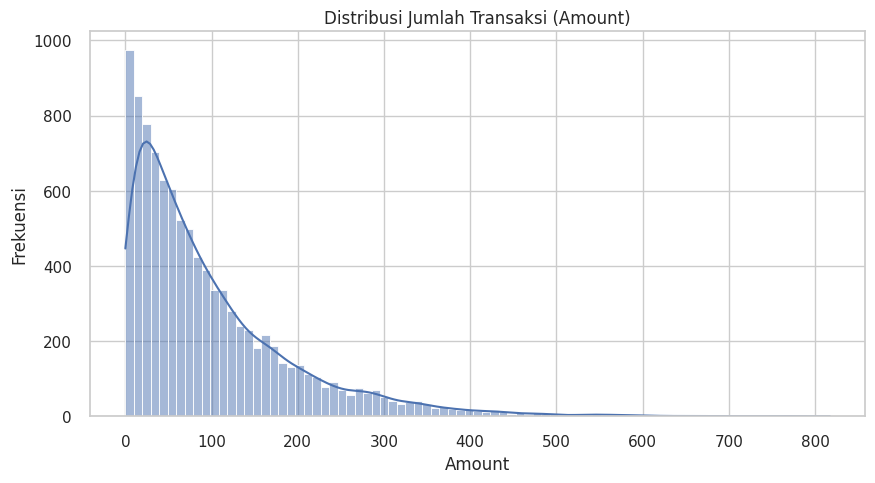

In [14]:
# Distribusi jumlah transaksi
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(df['amount'], kde=True)
plt.title("Distribusi Jumlah Transaksi (Amount)")
plt.xlabel("Amount")
plt.ylabel("Frekuensi")
plt.show()

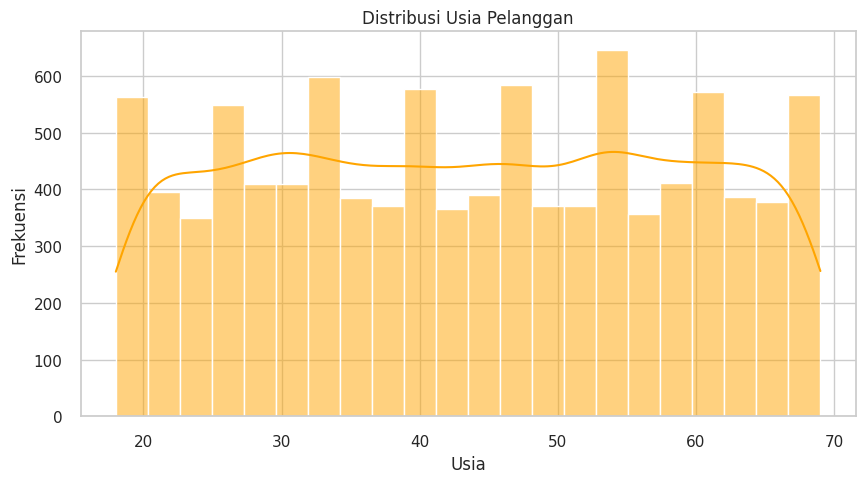

In [13]:
# Distribusi usia pelanggan
plt.figure(figsize=(10,5))
sns.histplot(df['customer_age'], kde=True, color='orange')
plt.title("Distribusi Usia Pelanggan")
plt.xlabel("Usia")
plt.ylabel("Frekuensi")
plt.show()

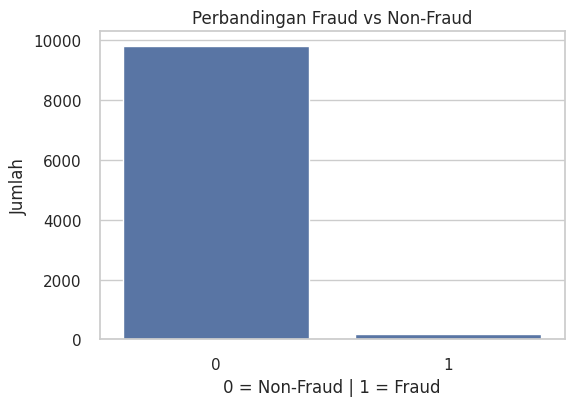

In [15]:
# Fraud vs Non-Fraud Count
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title("Perbandingan Fraud vs Non-Fraud")
plt.xlabel("0 = Non-Fraud | 1 = Fraud")
plt.ylabel("Jumlah")
plt.show()

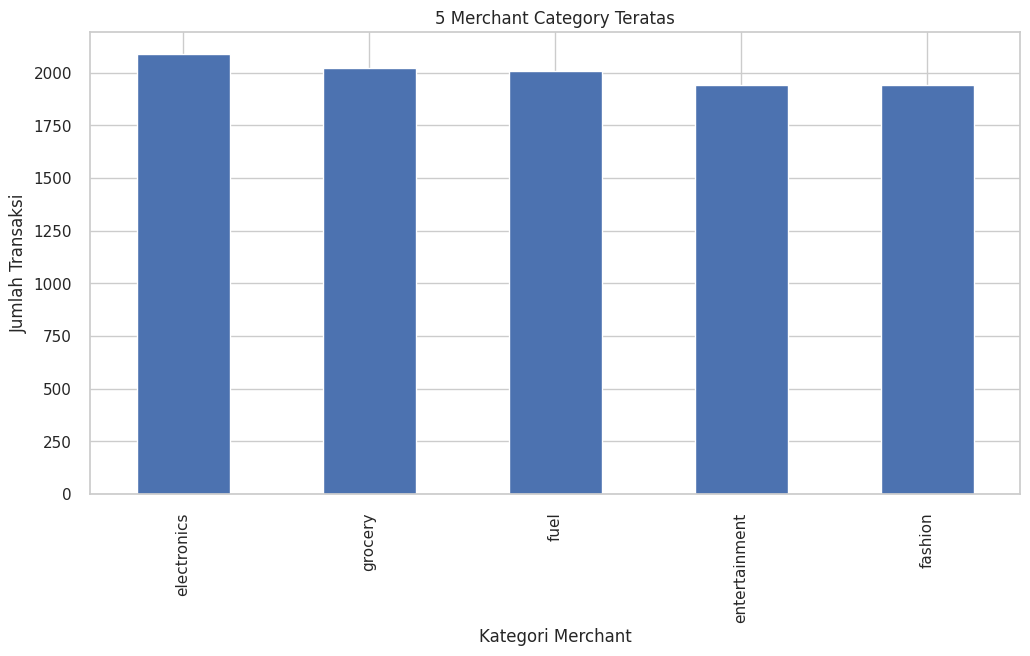

In [20]:
# Top merchant category
plt.figure(figsize=(12,6))
df['merchant_category'].value_counts().head(5).plot(kind='bar')
plt.title("5 Merchant Category Teratas")
plt.xlabel("Kategori Merchant")
plt.ylabel("Jumlah Transaksi")
plt.show()

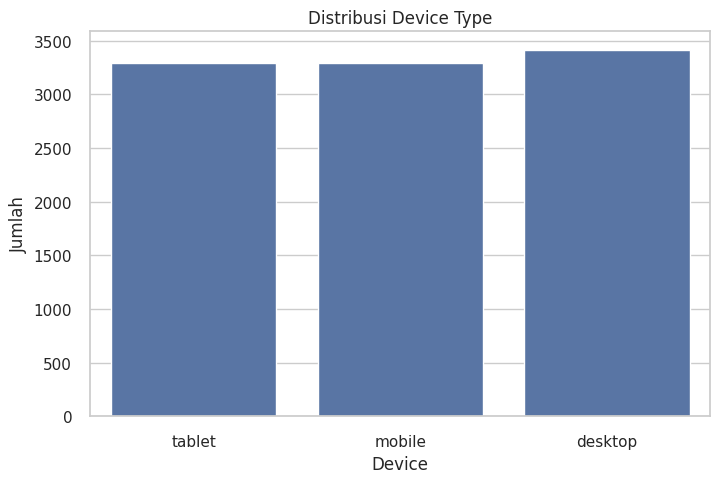

In [21]:
# Device Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='device_type', data=df)
plt.title("Distribusi Device Type")
plt.xlabel("Device")
plt.ylabel("Jumlah")
plt.show()

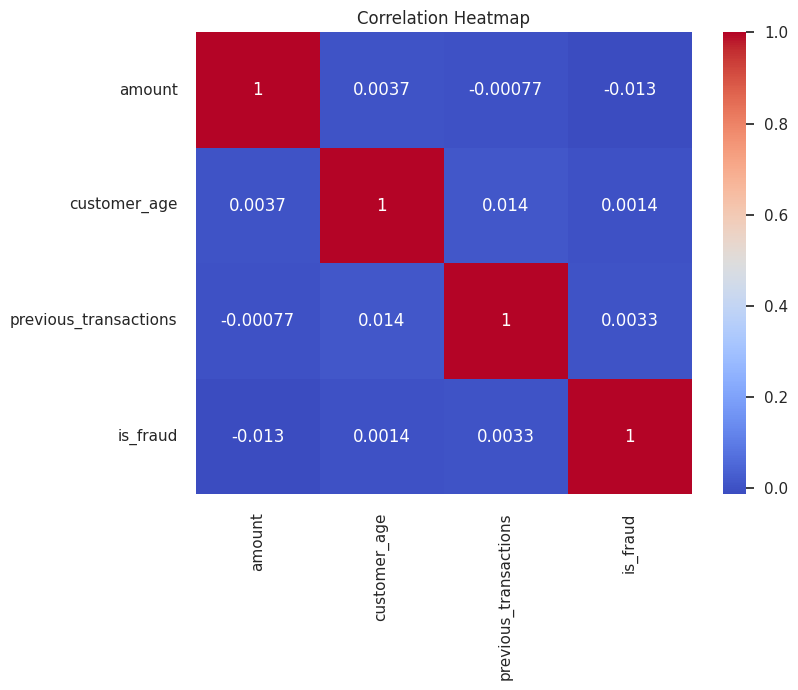

In [22]:
# Korelasi Antar Fitur Numerik
plt.figure(figsize=(8,6))
sns.heatmap(df[['amount','customer_age','previous_transactions','is_fraud']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [25]:
# Cek missing values
print("Missing values per kolom:")
print(df.isnull().sum())

# Cek jumlah duplikat
print("\nJumlah duplikat:", df.duplicated().sum())

Missing values per kolom:
transaction_id           0
timestamp                0
amount                   0
merchant_category        0
customer_id              0
customer_age             0
customer_location        0
device_type              0
previous_transactions    0
is_fraud                 0
dtype: int64

Jumlah duplikat: 0


In [26]:
# Konversi Timestamp Menjadi Datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

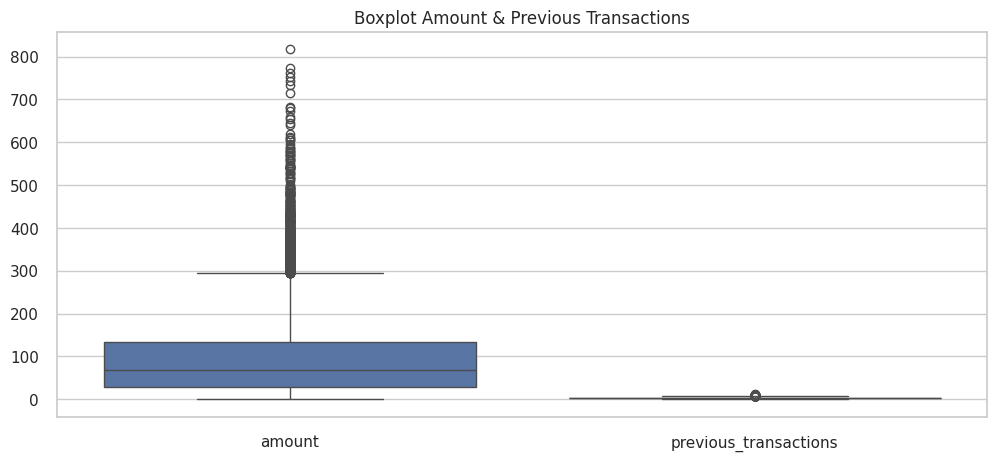

In [27]:
# Cek Outlier
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['amount', 'previous_transactions']])
plt.title("Boxplot Amount & Previous Transactions")
plt.show()

In [28]:
# Penanganan Outlier
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"Before clipping, range: {df[column].min()} - {df[column].max()}")
    print(f"IQR Lower bound = {lower}, Upper bound = {upper}")

    # Clipping → membatasi nilai agar tidak terlalu ekstrem
    df[column] = df[column].clip(lower, upper)

    print(f"After clipping, range: {df[column].min()} - {df[column].max()}")
    print("="*60)

# Terapkan ke kolom amount saja
handle_outliers_iqr(df, 'amount')


Before clipping, range: 0.0 - 817.24
IQR Lower bound = -131.37124999999995, Upper bound = 294.35874999999993
After clipping, range: 0.0 - 294.35874999999993


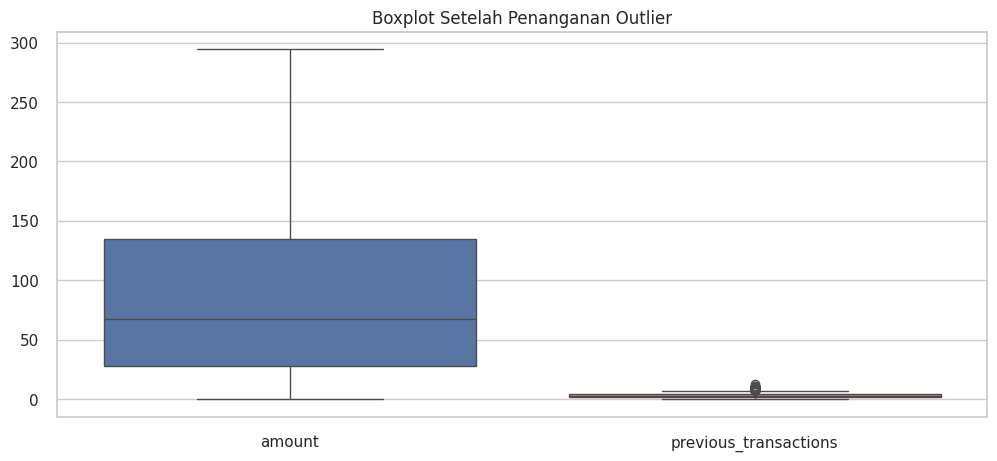

In [29]:
# Cek Ulang Boxplot Setelah Outlier Ditangani
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['amount', 'previous_transactions']])
plt.title("Boxplot Setelah Penanganan Outlier")
plt.show()

In [30]:
# Encoding Data Kategorikal
df = pd.get_dummies(df,
                    columns=['merchant_category','customer_location','device_type'],
                    drop_first=True)


In [31]:
# Scaling Fitur Numerik
numeric_cols = ['amount','customer_age','previous_transactions']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [32]:
# Binning Usia Pelanggan
bins = [0, 25, 40, 60, 100]
labels = ['young','adult','middle_age','senior']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)